In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
# Load my drive to access data and models
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/KD4AD/'

Mounted at /content/drive


# Fashion-MNIST

In [ ]:
# Original
original_aucs = [0.889, 0.842, 0.852, 0.852, 0.866, 0.841, 0.848, 0.795]
original_aucs_errors = [0.073, 0.063, 0.076, 0.065, 0.082, 0.081, 0.096, 0.096]
original_auc_ratios = [i/original_aucs[0] for i in original_aucs][1:]
original_auc_ratios_errors = [math.sqrt(( original_aucs_errors[0] / original_aucs[i])**2 + (original_aucs[0] * original_aucs_errors[i] / original_aucs[i]**2 )**2) for i in range(len(original_aucs))][1:]
original_emd_anomaly = [0.019, 0.019, 0.018, 0.015, 0.019, 0.019, 0.022]
original_emd_anomaly_errors = [0.012, 0.012, 0.011, 0.009, 0.011, 0.010, 0.012]
# original_emd_normal = [0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002]

In [ ]:
# Co-learning
colearning_aucs = [0.89, 0.844, 0.849, 0.861, 0.824, 0.838, 0.873, 0.797]
colearning_aucs_errors = [0.072, 0.069, 0.078, 0.076, 0.09, 0.089, 0.068, 0.126]
colearning_auc_ratios = [i/colearning_aucs[0] for i in colearning_aucs][1:]
colearning_auc_ratios_errors = [math.sqrt(( colearning_aucs_errors[0] / colearning_aucs[i])**2 + (colearning_aucs[0] * colearning_aucs_errors[i] / colearning_aucs[i]**2 )**2) for i in range(len(colearning_aucs))][1:]
colearning_emd_anomaly = [0.018, 0.019, 0.016, 0.019, 0.019, 0.017, 0.021]
colearning_emd_anomaly_errors = [0.015, 0.014, 0.013, 0.015, 0.012, 0.011, 0.011]
# colearning_emd_normal = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002]

In [ ]:
# Co-learning and pseudo outlier exposure
colearning_outliers_aucs = [0.892, 0.872, 0.872, 0.876, 0.865, 0.87, 0.865, 0.854]
colearning_outliers_aucs_errors = [0.074, 0.073, 0.087, 0.084, 0.101, 0.073, 0.073, 0.109]
colearning_outliers_auc_ratios = [i/colearning_outliers_aucs[0] for i in colearning_outliers_aucs][1:]
colearning_outliers_auc_ratios_errors = [math.sqrt(( colearning_outliers_aucs_errors[0] / colearning_outliers_aucs[i])**2 + (colearning_outliers_aucs[0] * colearning_outliers_aucs_errors[i] / colearning_outliers_aucs[i]**2 )**2) for i in range(len(colearning_outliers_aucs))][1:]
colearning_outliers_emd_anomaly = [0.014, 0.013, 0.011, 0.009, 0.01, 0.01, 0.01]
colearning_outliers_emd_anomaly_errors = [0.009, 0.007, 0.006, 0.004, 0.005, 0.004, 0.006]
# colearning_outliers_emd_normal = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002]

In [ ]:
# Noise outlier exposure
noise_outliers_aucs = [0.889, 0.817, 0.825, 0.835, 0.802, 0.784, 0.834, 0.8]
noise_outliers_aucs_errors = [0.073, 0.128, 0.119, 0.098, 0.123, 0.135, 0.095, 0.123]
noise_outliers_auc_ratios = [i/noise_outliers_aucs[0] for i in noise_outliers_aucs][1:]
noise_outliers_auc_ratios_errors = [math.sqrt(( noise_outliers_aucs_errors[0] / noise_outliers_aucs[i])**2 + (noise_outliers_aucs[0] * noise_outliers_aucs_errors[i] / noise_outliers_aucs[i]**2 )**2) for i in range(len(noise_outliers_aucs))][1:]
noise_outliers_emd_anomaly = [0.014, 0.016, 0.015, 0.017, 0.017, 0.017, 0.017]
noise_outliers_emd_anomaly_errors = [0.012, 0.012, 0.011, 0.013, 0.011, 0.012, 0.01]

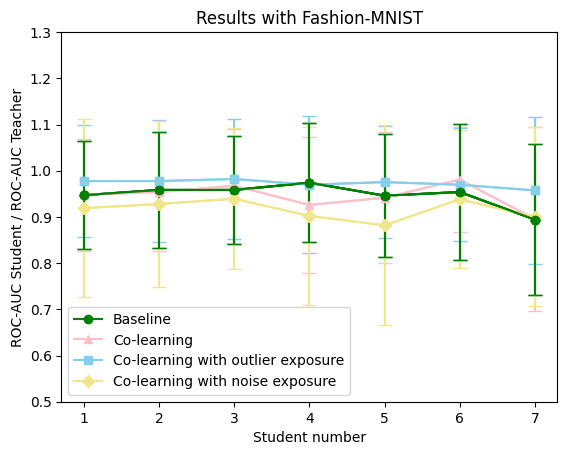

In [ ]:
plt.errorbar(range(1,8), original_auc_ratios, yerr=original_auc_ratios_errors, color='green', marker='o', capsize=5)
plt.errorbar(range(1,8), colearning_auc_ratios, yerr=colearning_auc_ratios_errors, color='pink', marker='^', capsize=5)
plt.errorbar(range(1,8), colearning_outliers_auc_ratios, yerr=colearning_outliers_auc_ratios_errors, color='skyblue', marker='s', capsize=5)
plt.errorbar(range(1,8), noise_outliers_auc_ratios, yerr=noise_outliers_auc_ratios_errors, color='khaki', marker='D', capsize=5)
plt.errorbar(range(1,8), original_auc_ratios, yerr=original_auc_ratios_errors, color='green', marker='o', capsize=5)

plt.plot(range(1,8), original_auc_ratios, color='green', marker='o', label='Baseline')
plt.plot(range(1,8), colearning_auc_ratios, color='pink', marker='^', label='Co-learning')
plt.plot(range(1,8), colearning_outliers_auc_ratios, color='skyblue', marker='s', label='Co-learning with outlier exposure')
plt.plot(range(1,8), noise_outliers_auc_ratios, color='khaki', marker='D', label='Co-learning with noise exposure')
plt.plot(range(1,8), original_auc_ratios, color='green', marker='o')

# plt.grid()
plt.title('Results with Fashion-MNIST')
plt.legend()
plt.ylim(0.5, 1.3)
plt.xlabel("Student number")
plt.ylabel("ROC-AUC Student / ROC-AUC Teacher")
plt.savefig(drive_path+'auc_ratios_fmnist_err.pdf')

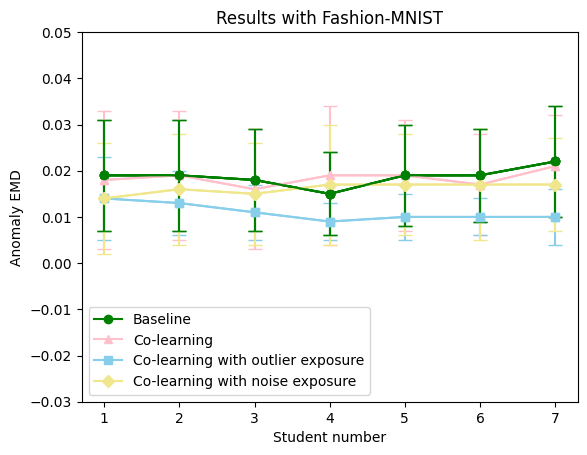

In [ ]:
plt.errorbar(range(1,8), original_emd_anomaly, yerr=original_emd_anomaly_errors, color='green', marker='o', capsize=5)
plt.errorbar(range(1,8), colearning_emd_anomaly, yerr=colearning_emd_anomaly_errors, color='pink', marker='^', capsize=5)
plt.errorbar(range(1,8), colearning_outliers_emd_anomaly, yerr=colearning_outliers_emd_anomaly_errors, color='skyblue', marker='s', capsize=5)
plt.errorbar(range(1,8), noise_outliers_emd_anomaly, yerr=noise_outliers_emd_anomaly_errors, color='khaki', marker='D', capsize=5)
plt.errorbar(range(1,8), original_emd_anomaly, yerr=original_emd_anomaly_errors, color='green', marker='o', capsize=5)

plt.plot(range(1,8), original_emd_anomaly, color='green', marker='o', label='Baseline')
plt.plot(range(1,8), colearning_emd_anomaly, color='pink', marker='^', label='Co-learning')
plt.plot(range(1,8), colearning_outliers_emd_anomaly, color='skyblue', marker='s', label='Co-learning with outlier exposure')
plt.plot(range(1,8), noise_outliers_emd_anomaly, color='khaki', marker='D', label='Co-learning with noise exposure')
plt.plot(range(1,8), original_emd_anomaly, color='green', marker='o')

# plt.grid()
plt.title('Results with Fashion-MNIST')
plt.legend()
plt.ylim(-0.03, 0.05)
plt.xlabel("Student number")
plt.ylabel("Anomaly EMD")
plt.savefig(drive_path+'emd_anomaly_fmnist_err.pdf')

#MNIST

In [ ]:
# Original
original_aucs = [0.948, 0.936, 0.935, 0.918, 0.882, 0.869, 0.784, 0.818]
original_aucs_errors = [0.036, 0.047, 0.037, 0.055, 0.069, 0.052, 0.085, 0.088]
original_auc_ratios = [i/original_aucs[0] for i in original_aucs][1:]
original_auc_ratios_errors = [math.sqrt(( original_aucs_errors[0] / original_aucs[i])**2 + (original_aucs[0] * original_aucs_errors[i] / original_aucs[i]**2 )**2) for i in range(len(original_aucs))][1:]
original_emd_anomaly = [0.015, 0.016, 0.017, 0.019, 0.02, 0.021, 0.021]
original_emd_anomaly_errors = [0.006, 0.006, 0.007, 0.006, 0.007, 0.007, 0.007]
# original_emd_normal = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]

In [ ]:
# Co-learning
colearning_aucs = [0.945, 0.937, 0.931, 0.924, 0.884, 0.857, 0.83, 0.832]
colearning_aucs_errors = [0.039, 0.048, 0.045, 0.054, 0.061, 0.072, 0.066, 0.09]
colearning_auc_ratios = [i/colearning_aucs[0] for i in colearning_aucs][1:]
colearning_auc_ratios_errors = [math.sqrt(( colearning_aucs_errors[0] / colearning_aucs[i])**2 + (colearning_aucs[0] * colearning_aucs_errors[i] / colearning_aucs[i]**2 )**2) for i in range(len(colearning_aucs))][1:]
colearning_emd_anomaly = [0.013, 0.015, 0.014, 0.017, 0.018, 0.019, 0.02]
colearning_emd_anomaly_errors = [0.005, 0.006, 0.005, 0.005, 0.006, 0.007, 0.006]
# colearning_emd_normal = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]

In [ ]:
# Co-learning and pseudo outlier exposure
colearning_outliers_aucs = [0.944, 0.931, 0.946, 0.921, 0.895, 0.883, 0.838, 0.833]
colearning_outliers_aucs_errors = [0.041, 0.061, 0.051, 0.063, 0.084, 0.077, 0.117, 0.115]
colearning_outliers_auc_ratios = [i/colearning_outliers_aucs[0] for i in colearning_outliers_aucs][1:]
colearning_outliers_auc_ratios_errors = [math.sqrt(( colearning_outliers_aucs_errors[0] / colearning_outliers_aucs[i])**2 + (colearning_outliers_aucs[0] * colearning_outliers_aucs_errors[i] / colearning_outliers_aucs[i]**2 )**2) for i in range(len(colearning_outliers_aucs))][1:]
colearning_outliers_emd_anomaly = [0.008, 0.005, 0.009, 0.008, 0.005, 0.008, 0.007]
colearning_outliers_emd_anomaly = [0.003, 0.002, 0.002, 0.003, 0.003, 0.002, 0.004]
# colearning_outliers_emd_normal = [0.001, 0, 0, 0.001, 0.002, 0.001, 0.002]

In [ ]:
# Noise outlier exposure
noise_outliers_aucs = [0.946, 0.915, 0.891, 0.899, 0.868, 0.849, 0.804, 0.832]
noise_outliers_aucs_errors = [0.041, 0.062, 0.101, 0.084, 0.082, 0.101, 0.111, 0.125]
noise_outliers_auc_ratios = [i/noise_outliers_aucs[0] for i in noise_outliers_aucs][1:]
noise_outliers_auc_ratios_errors = [math.sqrt(( noise_outliers_aucs_errors[0] / noise_outliers_aucs[i])**2 + (noise_outliers_aucs[0] * noise_outliers_aucs_errors[i] / noise_outliers_aucs[i]**2 )**2) for i in range(len(noise_outliers_aucs))][1:]
noise_outliers_emd_anomaly = [0.011, 0.011, 0.012, 0.012, 0.012, 0.013, 0.013]
noise_outliers_emd_anomaly_errors = [0.005, 0.007, 0.008, 0.006, 0.007, 0.007, 0.007]

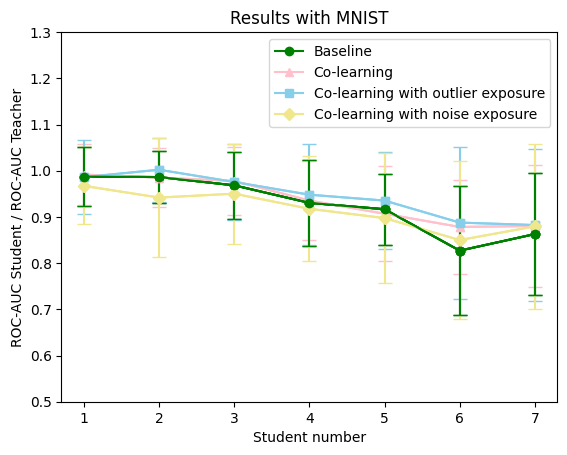

In [ ]:
plt.errorbar(range(1,8), original_auc_ratios, yerr=original_auc_ratios_errors, color='green', marker='o', capsize=5)
plt.errorbar(range(1,8), colearning_auc_ratios, yerr=colearning_auc_ratios_errors, color='pink', marker='^', capsize=5)
plt.errorbar(range(1,8), colearning_outliers_auc_ratios, yerr=colearning_outliers_auc_ratios_errors, color='skyblue', marker='s', capsize=5)
plt.errorbar(range(1,8), noise_outliers_auc_ratios, yerr=noise_outliers_auc_ratios_errors, color='khaki', marker='D', capsize=5)
plt.errorbar(range(1,8), original_auc_ratios, yerr=original_auc_ratios_errors, color='green', marker='o', capsize=5)

plt.plot(range(1,8), original_auc_ratios, color='green', marker='o', label='Baseline')
plt.plot(range(1,8), colearning_auc_ratios, color='pink', marker='^', label='Co-learning')
plt.plot(range(1,8), colearning_outliers_auc_ratios, color='skyblue', marker='s', label='Co-learning with outlier exposure')
plt.plot(range(1,8), noise_outliers_auc_ratios, color='khaki', marker='D', label='Co-learning with noise exposure')
plt.plot(range(1,8), original_auc_ratios, color='green', marker='o')

# plt.grid()
plt.title('Results with MNIST')
plt.legend()
plt.ylim(0.5, 1.3)
plt.xlabel("Student number")
plt.ylabel("ROC-AUC Student / ROC-AUC Teacher")
plt.savefig(drive_path+'auc_ratios_mnist_err.pdf')

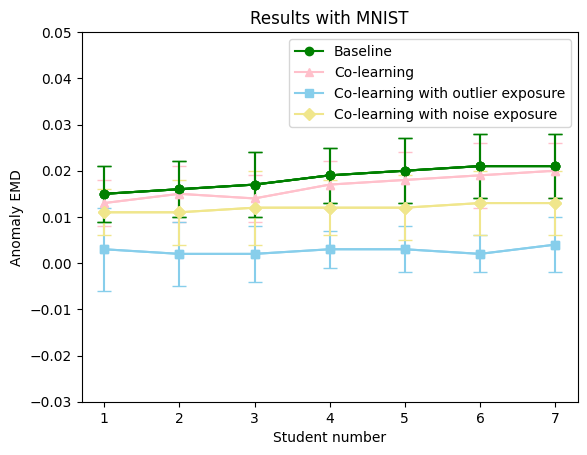

In [ ]:
plt.errorbar(range(1,8), original_emd_anomaly, yerr=original_emd_anomaly_errors, color='green', marker='o', capsize=5)
plt.errorbar(range(1,8), colearning_emd_anomaly, yerr=colearning_emd_anomaly_errors, color='pink', marker='^', capsize=5)
plt.errorbar(range(1,8), colearning_outliers_emd_anomaly, yerr=colearning_outliers_emd_anomaly_errors, color='skyblue', marker='s', capsize=5)
plt.errorbar(range(1,8), noise_outliers_emd_anomaly, yerr=noise_outliers_emd_anomaly_errors, color='khaki', marker='D', capsize=5)
plt.errorbar(range(1,8), original_emd_anomaly, yerr=original_emd_anomaly_errors, color='green', marker='o', capsize=5)

plt.plot(range(1,8), original_emd_anomaly, color='green', marker='o', label='Baseline')
plt.plot(range(1,8), colearning_emd_anomaly, color='pink', marker='^', label='Co-learning')
plt.plot(range(1,8), colearning_outliers_emd_anomaly, color='skyblue', marker='s', label='Co-learning with outlier exposure')
plt.plot(range(1,8), noise_outliers_emd_anomaly, color='khaki', marker='D', label='Co-learning with noise exposure')
plt.plot(range(1,8), original_emd_anomaly, color='green', marker='o')

# plt.grid()
plt.title('Results with MNIST')
plt.legend()
plt.ylim(-0.03, 0.05)
plt.xlabel("Student number")
plt.ylabel("Anomaly EMD")
plt.savefig(drive_path+'emd_anomaly_mnist_err.pdf')